<a href="https://colab.research.google.com/github/Meghanah97/Playstore_data_analysis/blob/main/Copy_of_Copy_of_Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# “Technology is best when it brings people together.”

The hottest marketing and publicity tool around now is a mobile app, this is because of its numerous benefits. In fact, mobiles apps have become indispensable to businesses of today. Mobile application or mobile apps is a type of application software that have been designed for many purposes for people. Mobile apps can be run in any type of handset, including tablets and smart phones, literally we can get an app in our finger tips without struggling. At present, apps are frequently used by people for many reasons. One of the reasons are to ease their daily life tasks. Given this it is important to anlyze key factors responsible for engagement and success

**What we are upto?**\
1.Exploration namely:Head, tail, summary,data dictionary\
2.Looking for and handling NaN/Null/Missing Values\
3.Trying to get some conclusion from data,correlation, trends and making sense in doing so\
4.Variuous milestone given in the problem statement\
5.Using visualization for presnting the EDA\
6.Final summary of conclusion

In [1]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.graph_objs as go
from wordcloud import WordCloud

In [2]:
#mount your drive and read csv file
ply=pd.read_csv('/content/Play Store Data.csv')
usr=pd.read_csv('/content/User Reviews.csv')

In [3]:
#Basic exploration on dataframe
ply.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
ply.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
usr.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [6]:
usr.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
ply.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
ply.shape

(10841, 13)

In [11]:
usr.shape

(64295, 5)

With above exploration playstore dataframe has 10841 rows and 13 columns and user review dataframe has 64295 rows and 5 columns
# Playstore dataframe columns are:

1.App: This column gives App name

2.Category: This column is about category of respective App like family, game etc 

3.Rating: This column is about rating given by user on respective App, it varies from 1 to 5

4.Reviews: This column has star rating as well as text comment

5.Size: This column gives size of App

6.Installs: This column gives count on installs in particular App

7.Type: This column gives information on whether App is free or paid \

8.Price: If above column type is paid, mentions price of respective App\

9.Content Rating: This column gives content name of respective App like Everyone,Mature 17+\

10.Genres: This column represent which style or category  App is about like education, astrology etc 

11.Last updated: This column is about the when the App was updated.

12.Current ver: This column is about the current version of the App.

13.Android Ver: This column is about the android version which can support the App on its platform.\
# Similiarly User review columns are:
1. App:  This column gives App name
2. Translated_review: this column about review given by user
3. Sentiment: this column distinguish between positive, negative and nuetral.
4. Sentiment_Polarity: It defines the orientation of the expressed sentiment, ranges from [-1,1]  
5. Sentiment_Subjectivity: It defines the orientation of the expressed sentiment, ranges from [0,1]

# **Data cleaning**
Removing unwanted values,unwanted outliers, replacing missing values.

In [12]:
ply.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
ply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


Columns like Reviews, Size, Installs, & price should have an int or float datatype, But here we can see of object type, So let’s convert them to their respective correct type.

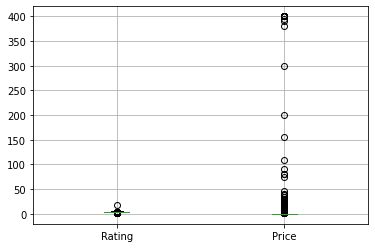

In [14]:
ply.boxplot();

Here we can Rating column has outlier, rating can only between 1-5,here it is greater than 17.5.hence there is outlier,needs to be corrected.

# Category and Rating

In [15]:
ply['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [16]:
ply[ply['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can see Category have wrong value i.e. 1.9 and rating have outlier.So it should be removed.

In [17]:
ply.drop([10472],inplace=True)

In [18]:
ply['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

We will check unique values of each column.

In [19]:
ply['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [20]:
ply['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [21]:
ply['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [22]:
ply['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

# Size
Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float

In [23]:
ply['Size'] = ply['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
ply['Size'] = ply['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
ply['Size'] = ply['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
ply['Size'] = ply['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
ply['Size'] = ply['Size'].apply(lambda x: float(x))
ply.dropna(subset = ['Size'], inplace=True)
ply['Size'].dtype



dtype('float64')

In [24]:
ply['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01, 9.40e+00,
       1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00, 7.90e+00,
       5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01, 3.60e+00,
       5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00, 1.60e+01,
       3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01, 3.20e+01,
       5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00, 9.80e+00,
       5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00, 7.10e+00,
       3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00, 8.20e+00,
       9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00, 1.30e+01,
       7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00, 7.20e+00,
       2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e+01, 2.30e

# Price
The values contain a special symbol $ which can be removed and then converted to the numeric type.

In [25]:
ply['Price'] = ply.Price.replace("Everyone",np.nan)
ply['Price'] = ply.Price.replace('$','')
ply['Price'] = pd.to_numeric(ply['Price'])
ply['Price'].dtype


dtype('float64')

# Installs
To convert Installs column from object to integer type. First of all, we will need to remove the '+',','symbol from these values.

In [26]:
ply['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

In [27]:
ply['Installs'] = ply.Installs.apply(lambda x: x.strip('+'))
ply['Installs'] = ply.Installs.apply(lambda x: x.replace(',', ''))
ply['Installs'] = pd.to_numeric(ply['Installs'])
ply['Installs'].dtype

dtype('int64')

In [28]:
ply['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,         50,        100,        500,
               10,          1,          5, 1000000000,          0])

# Reviews
Converting Review's type to int,replacing corresponding values.

In [29]:
ply['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [30]:
ply['Reviews'] = ply.Reviews.replace("0.0",0)
ply['Reviews'] = ply.Reviews.replace("3.0M",3000000)
ply['Reviews'] = ply.Reviews.astype(int)
ply['Reviews'].dtype

dtype('int64')

In [31]:

ply['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

# Last updated
Converting column last updated datatype to datetime

In [32]:
ply['Last Updated'] = pd.to_datetime(ply['Last Updated'])
ply['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10835   2016-09-29
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10840   2018-07-25
Name: Last Updated, Length: 9145, dtype: datetime64[ns]

In [33]:
ply.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9145 non-null   object        
 1   Category        9145 non-null   object        
 2   Rating          7729 non-null   float64       
 3   Reviews         9145 non-null   int64         
 4   Size            9145 non-null   float64       
 5   Installs        9145 non-null   int64         
 6   Type            9145 non-null   object        
 7   Price           9145 non-null   float64       
 8   Content Rating  9145 non-null   object        
 9   Genres          9145 non-null   object        
 10  Last Updated    9145 non-null   datetime64[ns]
 11  Current Ver     9137 non-null   object        
 12  Android Ver     9143 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1000.2+ KB


In [34]:
#removing duplicate values in App column
total = ply.isnull().sum().sort_values(ascending  = False)
ply.drop_duplicates(subset = 'App', keep = 'first' ,inplace = True)
ply.dropna(how = 'any',inplace  =True)

In [35]:
print("Number of Unique App names = ", len(ply['App'].unique()))
print("NUMBER of the Total App name = ", ply.shape[0])
print("Duplicate Apps = ",len(ply['App'])- len(ply['App'].unique()))

Number of Unique App names =  7023
NUMBER of the Total App name =  7023
Duplicate Apps =  0


In [36]:
total = ply.isnull().sum().sort_values(ascending  = False)

In [37]:
ply.drop_duplicates(subset = 'App', keep = 'first' ,inplace = True)

In [38]:
ply.dropna(how = 'any',inplace  =True)

In [39]:
ply.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [40]:
total1 = usr.isnull().sum().sort_values(ascending  = False)

In [41]:
usr.dropna(how='any',inplace=True)


In [42]:
usr.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

# Problem 1:which category section have more apps?

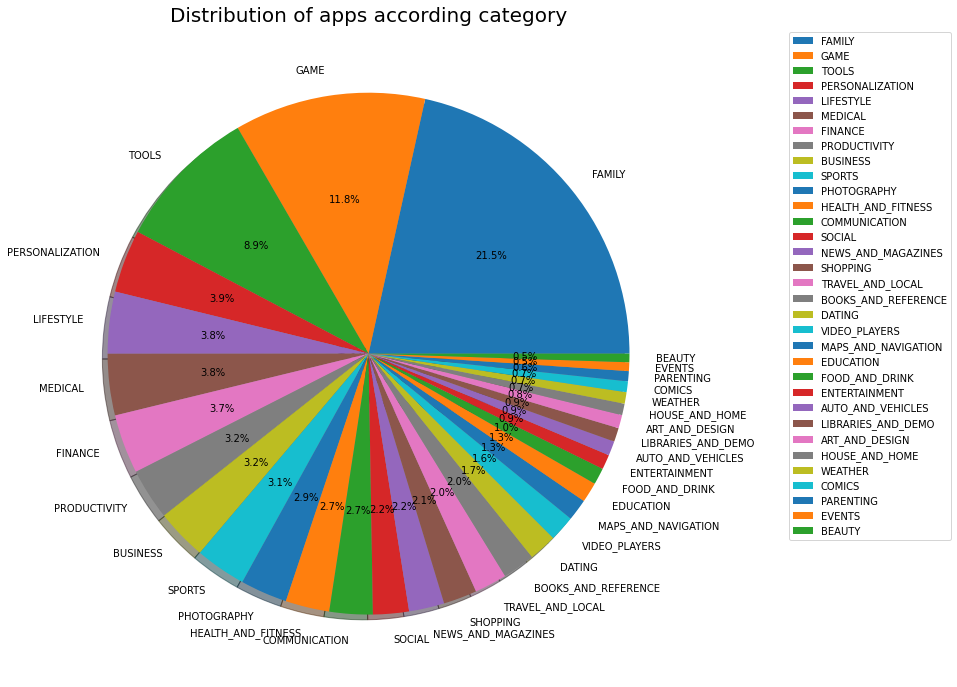

In [43]:
temp = ply['Category'].value_counts().reset_index()
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['Category'], labels= temp['index'],autopct= '%1.1f%%',shadow=True)
plt.legend()
plt.title('Distribution of apps according category',size = 20);
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

# Problem 2: Distribution of Apps according to content rating

In [44]:
a = ply['Content Rating'].value_counts().index
b = ply['Content Rating'].value_counts()

asis = []
bsis = []
for i in range(len(a)):
    asis.append(a[i])
    bsis.append(b[i])

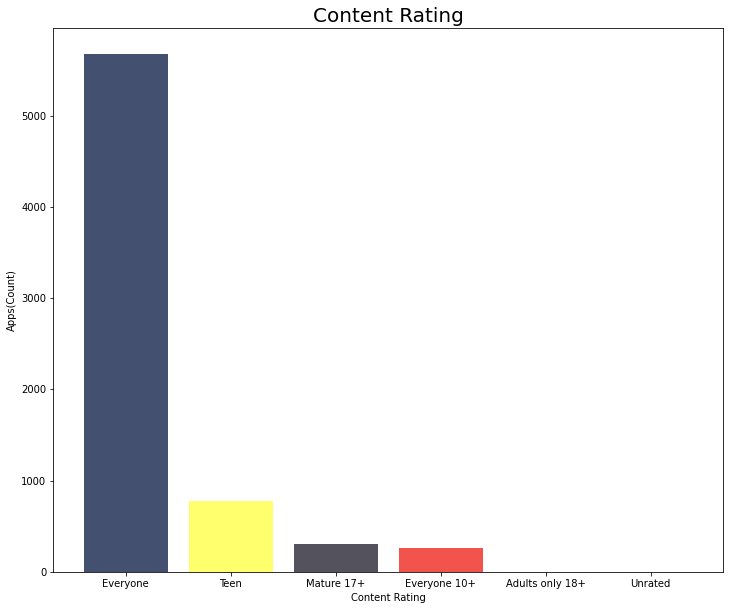

In [45]:
plt.figure(figsize=(12,10))
plt.bar(asis,bsis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

# Problem 3: Rating analysis

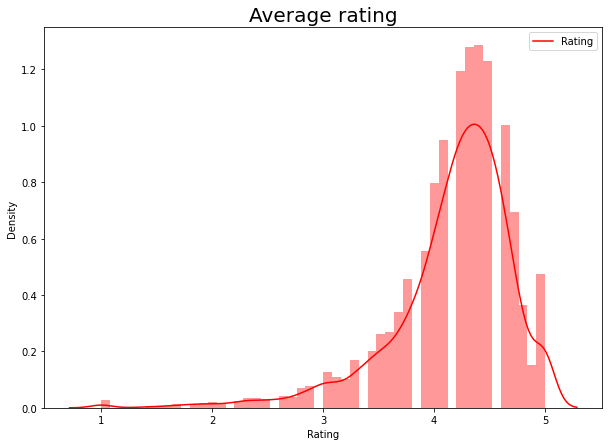

In [46]:
plt.figure(figsize=(10,7))
sns.distplot(ply['Rating'],color = 'red')
plt.legend(['Rating'])
plt.title('Average rating',size = 20)
plt.show()

# Problem 4: Percentage of Free Vs Paid Apps in playstore

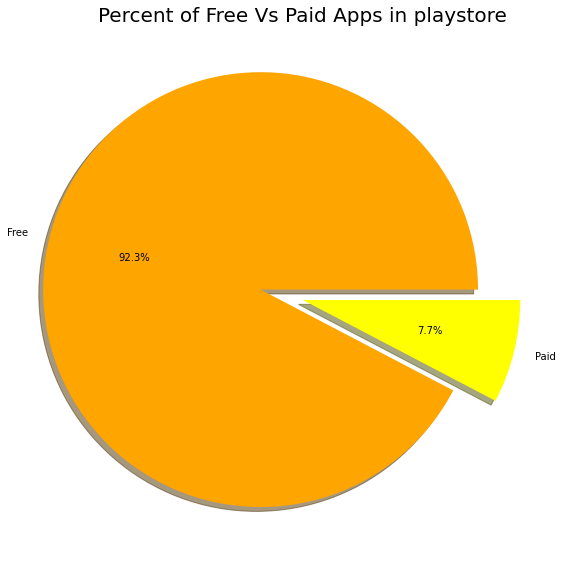

In [47]:
plt.figure(figsize=(10,10))
labels = ply['Type'].value_counts(sort = True).index
sizes = ply['Type'].value_counts(sort = True)
colors = ["orange","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in playstore',size = 20)
plt.show()

# Problem 5: Most reviewed Apps

In [48]:
Apps_with_Highest_rev = ply.sort_values(by='Reviews', ascending=False).head(20)

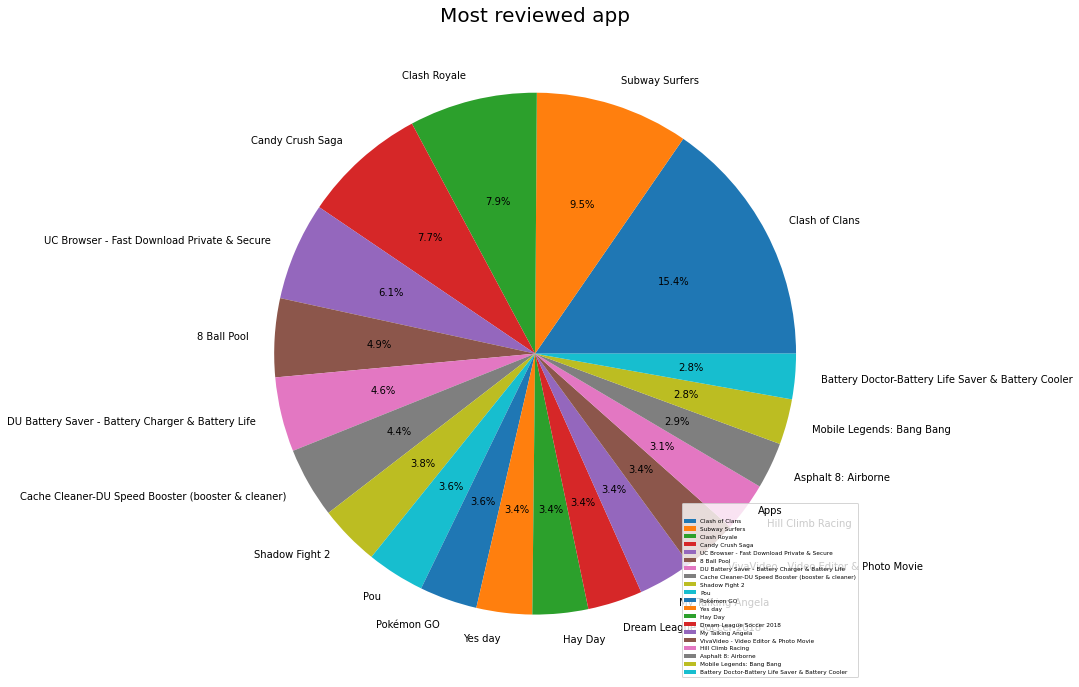

In [49]:
plt.figure(figsize=(15,12));
plt.pie(Apps_with_Highest_rev .Reviews, explode=None, labels=Apps_with_Highest_rev.App, autopct='%1.1f%%', startangle=0);
plt.title('Most reviewed app',size = 20);
plt.legend(Apps_with_Highest_rev.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );


# Problem 6: Top 5 paid apps

In [50]:
most_paid_app = ply.sort_values(by='Price', ascending=False).head(5)
most_paid_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up


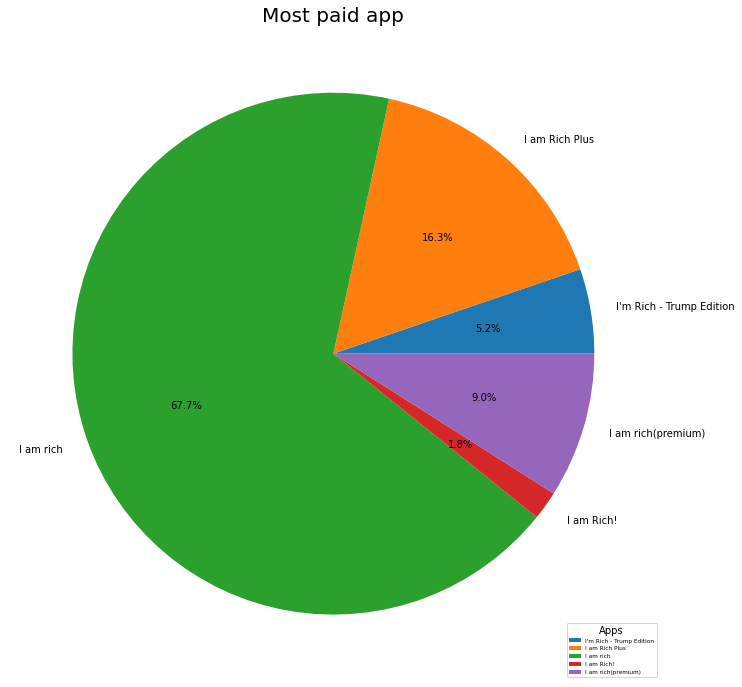

In [51]:
plt.figure(figsize=(15,12));
plt.pie(most_paid_app .Reviews, explode=None, labels=most_paid_app.App, autopct='%1.1f%%', startangle=0);
plt.title('Most paid app',size = 20);
plt.legend(most_paid_app.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

# Problem 7: Which category has most paid Apps?

In [52]:
most_paid_cat_ply =ply.groupby('Category')[['Price']].count().sort_values(by='Price', ascending=False).head(5)
most_paid_cat_ply

,Price
Category,
FAMILY,1511
GAME,832
TOOLS,626
PERSONALIZATION,274
LIFESTYLE,269


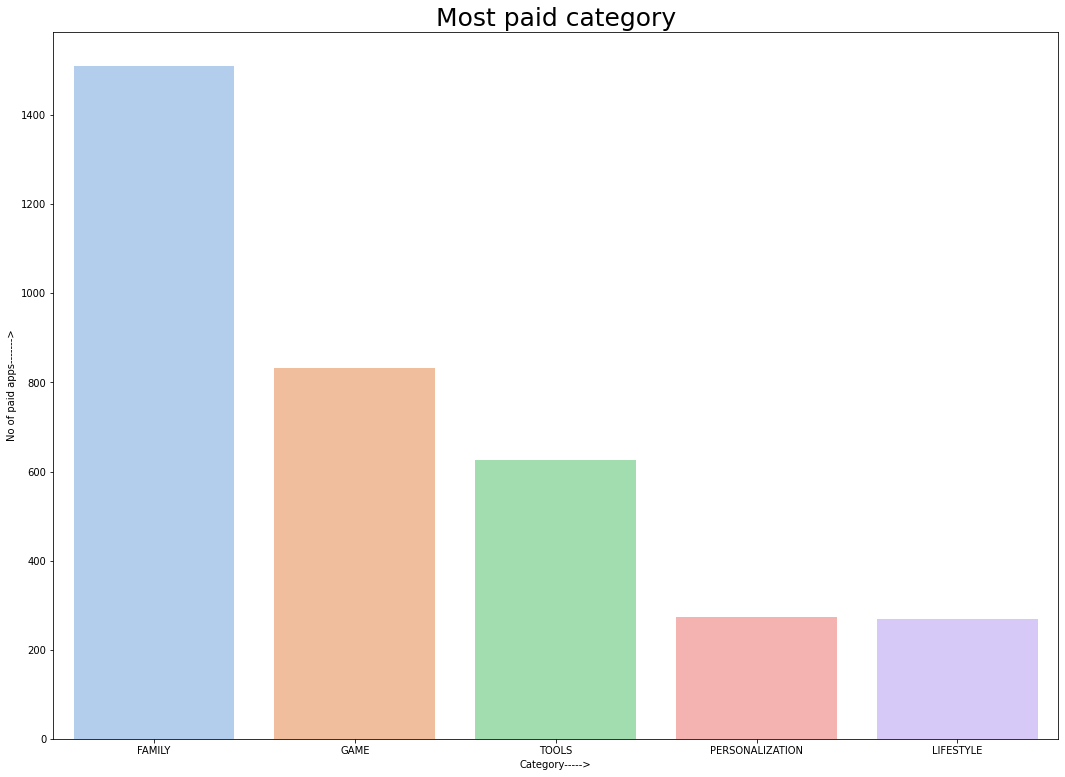

In [53]:
x2sis = []
y2sis = []

for i in range(len(most_paid_cat_ply)):
    x2sis.append(most_paid_cat_ply.index[i])
    y2sis.append(most_paid_cat_ply.Price[i])

plt.figure(figsize=(18,13))

plt.xlabel("Category----->")
plt.ylabel("No of paid apps------->")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "pastel")
graph.set_title("Most paid category", fontsize = 25);

#Problem 8: Correlation map of various coulmns

In [54]:
merged_df = ply.merge(usr, on="App")

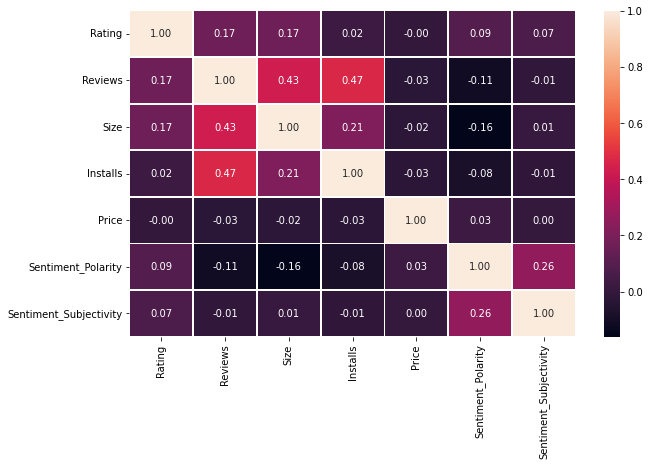

In [55]:
f,ax = plt.subplots(figsize=(10,6))
sns.heatmap(merged_df.corr(), annot=True, linewidths=.8, fmt= '.2f',ax=ax)
plt.show()

# Problem 9: Percentage of positive, negative and nuetral review on a Apps

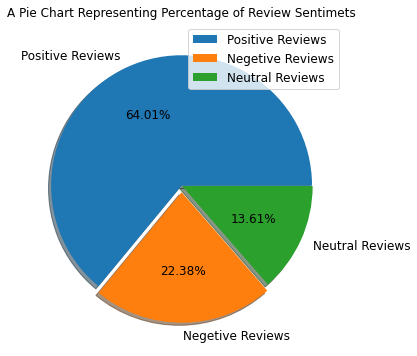

In [56]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=12)
plt.axis('off')
plt.legend()
plt.show()

# Problem 10:Most words used in review section by users

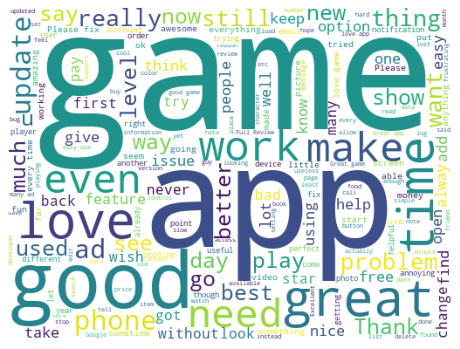

In [57]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(usr['Translated_Review']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

# Problem 11: Pricing distribution of paid App

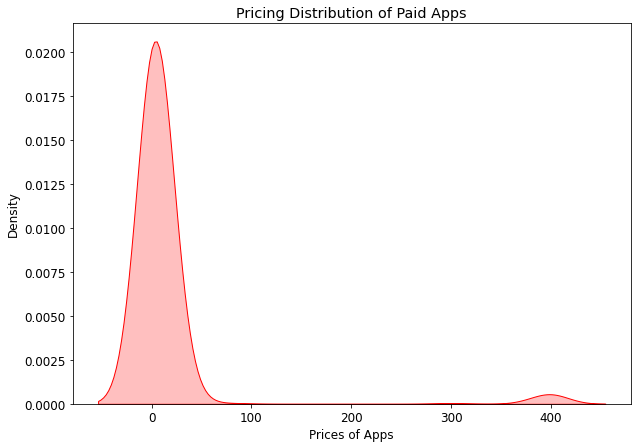

In [58]:
plt.figure(figsize=(10,7))
sns.kdeplot(ply[ply['Type'] == 'Paid']['Price'], color = 'red', shade = True)
plt.xlabel('Prices of Apps')
plt.title('Pricing Distribution of Paid Apps')
plt.show()

# Problem 12: Impact of Size on Installs

In [59]:
ply[ply['Type'] == 'Paid']['Price']

234       4.99
235       4.99
477       6.99
481       7.99
851       3.99
         ...  
10690     0.99
10697     0.99
10760     7.99
10782    16.99
10785     1.20
Name: Price, Length: 539, dtype: float64

In [60]:
ply['log_installs'] = np.log2(ply['Installs'])

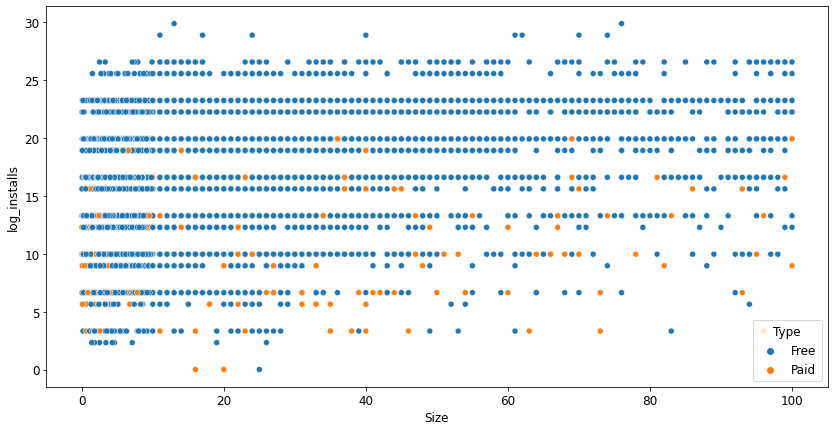

In [61]:
plt.figure(figsize=(14,7))
sns.scatterplot(ply['Size'],ply['log_installs'], hue=ply['Type'])
plt.show()

It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.

# Problem 15: Does sentiment subjectivity proportional to Sentiment polarity

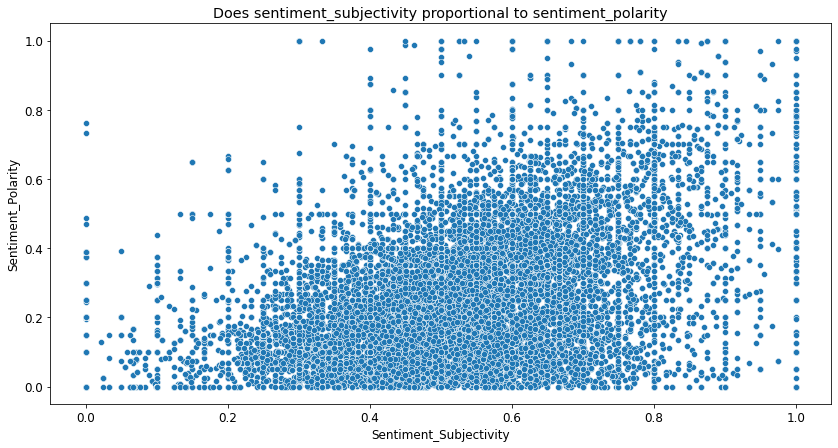

In [62]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()


# Problem 14: Top 5 rated Apps

In [63]:
ply[ply['Rating']==5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up,9.965784
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up,9.965784
615,Awake Dating,DATING,5.0,2,70.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up,6.643856
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3 and up,8.965784
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up,6.643856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up,6.643856
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up,9.965784
10776,Monster Ride Pro,GAME,5.0,1,24.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3 and up,3.321928
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up,9.965784


In [64]:
top_rat_app = ply.sort_values(by='Rating', ascending=False).head(5)
top_rat_app


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
10166,FA Player Essentials,SPORTS,5.0,7,68.0,100,Free,0.0,Everyone,Sports,2018-07-23,1.6.0,4.0.3 and up,6.643856
9245,EC Calgary,FAMILY,5.0,6,8.1,100,Free,0.0,Teen,Education,2018-06-26,3.8.0,4.1 and up,6.643856
9194,UP EB Bill Payment & Details,SOCIAL,5.0,3,2.4,50,Free,0.0,Teen,Social,2018-07-11,2.0,4.0 and up,5.643856
5506,AQ Ria Retail,FAMILY,5.0,4,52.0,50,Free,0.0,Everyone,Education,2018-04-03,1.1,4.1 and up,5.643856
5509,Wowkwis aq Ka'qaquj,FAMILY,5.0,1,49.0,10,Free,0.0,Everyone,Education;Education,2018-02-16,1.0,4.0.3 and up,3.321928


# Problem 15: Price distribution of paid Apps

In [65]:
ply_paid=ply[ply['Type']=='Paid']
ply_free=ply[ply['Type']=='Free']

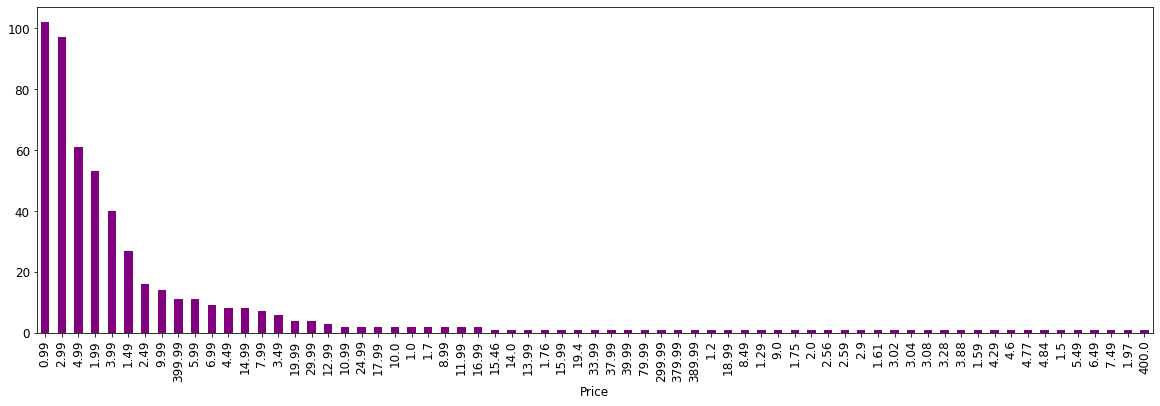

In [66]:
ply_paid.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'purple');

# Problem 16: Which App generated most revenue?

In [67]:
#Creating new column Revenue
ply_paid['Revenue'] = ply_paid['Installs']*ply_paid['Price']
ply_paid.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,16.609640,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,16.609640,499000.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,9.965784,6990.0
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17.0,100,Paid,7.99,Mature 17+,Dating,2017-01-21,1.0.1,4.0 and up,6.643856,799.0
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63.0,1000,Paid,3.99,Everyone,Education;Pretend Play,2017-07-24,1.0,4.0.3 and up,9.965784,3990.0


In [68]:
ply_paid[ply_paid['Revenue'] == ply_paid['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs,Revenue
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,16.60964,39999000.0


# Problem 17: Sentiment analysis of reviews

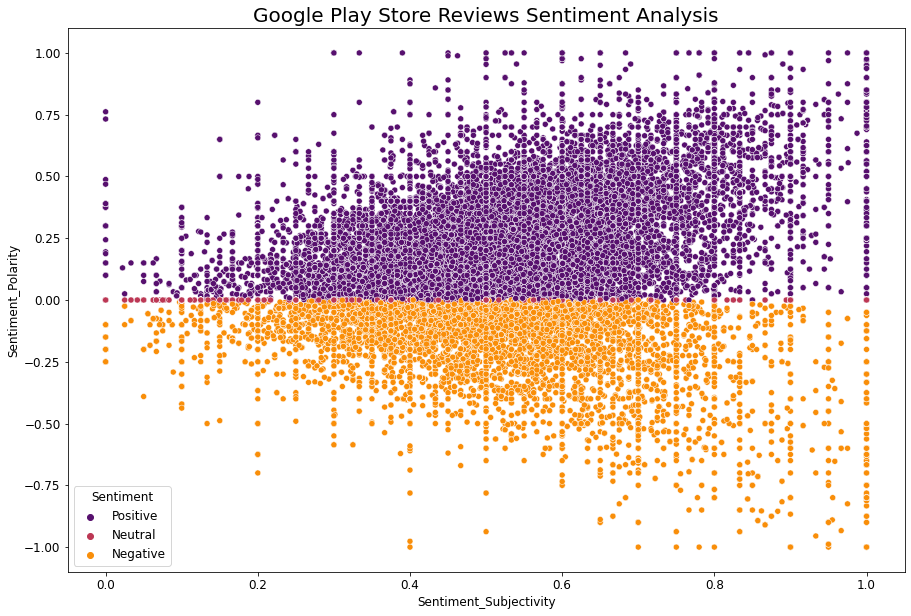

In [69]:
plt.figure(figsize=(15, 10))
sns.scatterplot(usr['Sentiment_Subjectivity'], usr['Sentiment_Polarity'],
                hue = usr['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

# Problem 18: Impact of Last update of Apps on rating

In [70]:
print(ply['Last Updated'].head())
#fetch update year from date
ply["Update year"] = ply["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]


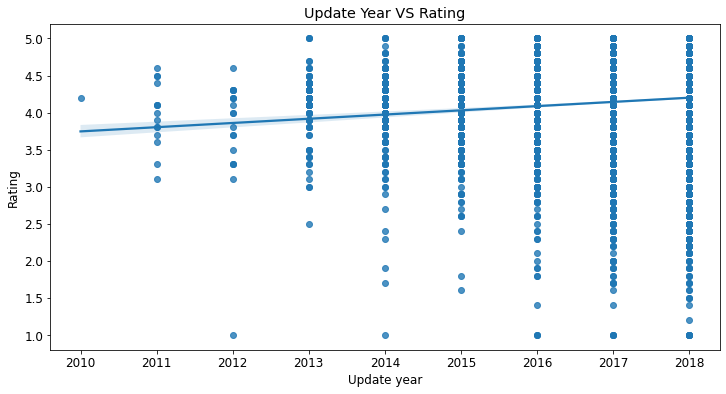

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update year", y="Rating", data=ply)
plt.title("Update Year VS Rating");

# Problem 19: In which month apps are updated the most?

In [72]:
ply_paid["Update month"] = ply_paid["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64') 
ply_free["Update month"] = ply_free["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64') 

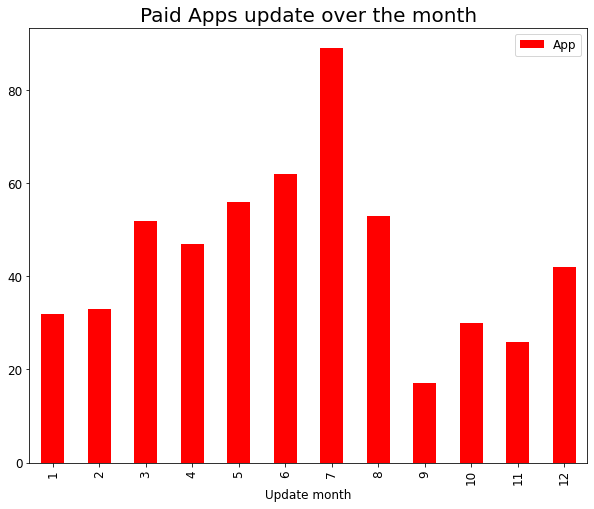

In [73]:
#Checking paid Apps update over month
ply_paid.groupby("Update month")["App"].count().plot.bar(figsize=(10,8), color= "red")
plt.title("Paid Apps update over the month", size=20)
plt.legend();

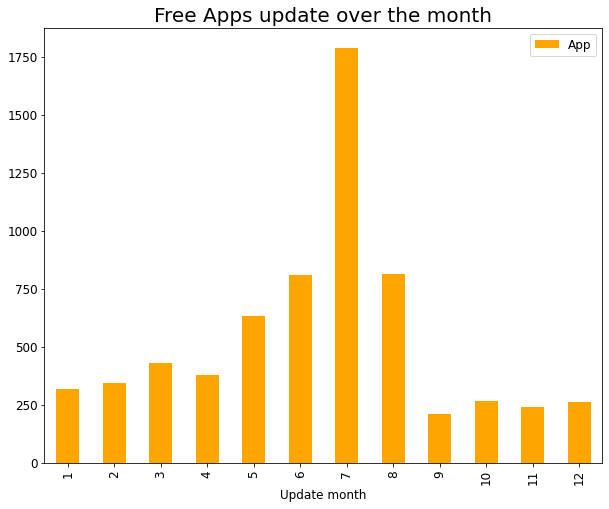

In [ ]:
#Checking free Apps update over month
ply_free.groupby("Update month")["App"].count().plot.bar(figsize=(10,8), color='orange')
plt.title("Free Apps update over the month", size=20)
plt.legend();

In [75]:
top_genres = ply.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [ ]:
genres_installs = ply.groupby(['Genres'])[['Installs']].sum()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)


In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()